In [84]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [85]:
L = 100

In [86]:
Mp = L-2
dim_Ap = Mp**2
Ap = np.zeros((dim_Ap, dim_Ap))
for i in range(dim_Ap):
    Ap[i,i] = -5
    if i+1<dim_Ap:
        Ap[i+1, i] = 1
        Ap[i, i+1] = 1
    if L-2+i < dim_Ap:
        Ap[L-2+i, i] = 1
        Ap[i, L-2+i] = 1
for m in range(1,L-2):
        Ap[m*Mp, m*Mp-1] = 0
        Ap[m*Mp-1, m*Mp] = 0

A = np.pad(Ap, (L+1,0), "constant", constant_values=0)
A = np.pad(A, (0,L+1), "constant", constant_values=0)
for n in tqdm(range(2,L-1)):
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=0)
    A = np.insert(A, n*L-1, 0, axis=1)
    A = np.insert(A, n*L-1, 0, axis=1)

A = A + np.eye(A.shape[0])

100%|██████████| 97/97 [01:18<00:00,  1.23it/s]


In [87]:
A[L+1,L] = 1
for i in range(1, L-1):
    A[i+L,i] = 1

In [88]:
dim_A = A.shape[0]
b = np.zeros(dim_A)
for i in range(1,L-1):
    b[i] = 1000

In [89]:
x_0 = np.zeros(dim_A)
for i in range(1,L-1):
    x_0[i] = 1000
print(x_0.shape)

(10000,)


In [99]:
range_inner = []
for d in range(1, L-1):
    for c in range(1,L-1):
        range_inner.append(d+c*L)

def Jacobi_relaxation(A, b, x_0, epsilon_max = 0.001):
    """
    :param A: 2D Array of shape (n,n)
    :param b:
    :param x_0:
    :param epsilon_max:
    :return: x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)
    """
    x = x_0
    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    J = np.matmul(D_inv, D-A)
    epsilon_mat = np.zeros(dim_A)
    epsilon_mat[L+1] = 1
    num_iterations = 0
    #pbar = tqdm(desc="while loop", total = epsilon_max)
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(D_inv,b) + np.matmul(J,x)
        for r in range_inner:
            epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_JR, num_iter_JR, err_max_JR, err_mean_JR = Jacobi_relaxation(A,b, x_0)

2.3970623764660104
1.2043185135439671
0.8036187793842373
0.6028886015151329
0.4812927976529977
0.3990455862791009
0.339477693721733
0.2940096630332505
0.25795280961631306
0.2286390838126522
0.2043503184200972
0.18390751587389786
0.1664634985702378
0.15142130482445282
0.1383397807397273
0.12686383276229662
0.116730794387081
0.1077246767295037
0.09967984579850508
0.09245560365695837
0.08595496512123191
0.08009053124106913
0.0747580985911327
0.06989442701342341
0.06545816828707984
0.061399495262890014
0.057662156343781135
0.05422032640615271
0.0510496140167902
0.04810590829976036
0.045381677073635274
0.04284748556375462
0.04048358573351152
0.03828370686426297
0.036219588678363834
0.03429442651594172
0.032481913940785034
0.03078522325972699
0.029185674457806954
0.0276803696495449
0.026262645559540942
0.02492098662540343
0.023658374272230276
0.02246323147159046
0.02133049280053001
0.020260876102014436
0.019247909009948216
0.018286702219057815
0.017374499919696973
0.01651141957685809
0.01569

In [129]:
range_inner = []
for d in range(1, L-1):
    for c in range(1,L-1):
        range_inner.append(d+c*L)

def Gauss_Seidel_relaxation(A, b, x_0, epsilon_max = 0.001):
    x = x_0
    D = np.diag(np.diag(A))
    L_mat = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L_mat)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.zeros(dim_A)
    epsilon_mat[101] = 1
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x = np.matmul(DL_inv,b) - np.matmul(J,x)
        if np.isnan(x).any() or np.isinf(x).any():
            print("NaN or Inf detected. Stopping simulation.")
            break
        for r_i in range_inner:
            epsilon_mat[r_i] = np.abs(x[r_i]-0.25*(x[r_i+L]+x[r_i-L]+x[r_i+1]+x[r_i-1]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_GSR, num_iter_GSR, err_max_GSR, err_mean_GSR = Gauss_Seidel_relaxation(A,b, x_0)

1.1576806420809476
0.5851341285617764
0.3890339814843742
0.2869216162325188
0.2235034786638721
0.1799161190056111
0.14818312558440994
0.12414779136781817
0.10542591763993414
0.09052356743882228
0.0784016927429434
0.06844610980186872
0.06011886168209912
0.0530967083456062
0.04711109927177404
0.04195670337321644
0.03748365603621551
0.033574265278673465
0.030135479682712685
0.0270932570240916
0.024388297819598392
0.021978534706590835
0.019821872834768328
0.017886756743678234
0.016148996275205718
0.0145852615061699
0.013174915905409534
0.011905434135570658
0.010759536091313748
0.009724568016366675
0.008789656922516542
0.007945308154887698
0.007183098683668732
0.006494128199932447
0.005871333880435259
0.0053083392872110835
0.004799386641821002
0.004339275947330634
0.003923310254464241
0.003547246431566009
0.0032072508636815655
0.0028998595691973605
0.002621942275766287
0.00237067004667324
0.002143486097168079
0.0019380794743710794
0.0017523613130947524
0.0015844434079781422
0.00143261887188

In [132]:
def SO_relaxation(A, b, x_0, epsilon_max = 0.001, w=1):
    x = x_0
    D = np.diag(np.diag(A))
    L_mat = np.tril(A, -1)
    R = np.triu(A, 1)
    DL_inv = np.linalg.inv(D+L_mat)
    J = np.matmul(DL_inv, R)
    epsilon_mat = np.zeros(dim_A)
    epsilon_mat[L+1] = 1
    num_iterations = 0
    while np.max(epsilon_mat) > epsilon_max:
        x_GSR = np.matmul(DL_inv,b) - np.matmul(J,x)
        x = w*x_GSR+(1-w)*x
        if np.isnan(x).any() or np.isinf(x).any():
            print("NaN or Inf detected. Stopping simulation.")
            break
        for r in range_inner:
            epsilon_mat[r] = np.abs(x[r]-0.25*(x[r+L]+x[r-L]+x[r+1]+x[r-1]))
        num_iterations += 1
        if num_iterations%100 == 0:
            print(np.max(epsilon_mat))
    return x, num_iterations, np.max(epsilon_mat), np.mean(epsilon_mat)

x_end_SOR_05, num_iter_SOR_05, err_max_SOR_05, err_mean_SOR_05 = SO_relaxation(A,b, x_0, w=0.5)

In [133]:
x_end_SOR_1, num_iter_SOR_1, err_max_SOR_1, err_mean_SOR_1 = SO_relaxation(A,b, x_0, w=1)

In [134]:
x_end_SOR_125, num_iter_SOR_125, err_max_SOR_125, err_mean_SOR_125 = SO_relaxation(A,b, x_0, w=1.25)

In [136]:
x_end_SOR_15, num_iter_SOR_15, err_max_SOR_15, err_mean_SOR_15 = SO_relaxation(A,b, x_0, w=1.5)

In [135]:
x_end_SOR_175, num_iter_SOR_175, err_max_SOR_175, err_mean_SOR_175 = SO_relaxation(A,b, x_0, w=1.75)

In [137]:
x_end_SOR_199, num_iter_SOR_199, err_max_SOR_199, err_mean_SOR_199 = SO_relaxation(A,b, x_0, w=1.99)

91.50808531830724
33.49491871449043
12.26022351782143
4.48763831876128
1.6426207606036496
0.6012523228277661
0.22007779542061473
0.08055559072005838
0.029485951473910994
0.010792811852664463
0.00395051819135223
0.00144601742282314


In [138]:
x_end_SOR_3, num_iter_SOR_3, err_max_SOR_3, err_mean_SOR_3 = SO_relaxation(A,b, x_0, w=3)

3.1691265005705735e+32
4.0173451106474757e+62
5.092589940836215e+92
6.4556246952172715e+122
8.183476519740355e+152
1.0373788922202482e+183
1.3150339753870934e+213
1.6670036082199636e+243
2.113178124542661e+273
2.6787715179656683e+303
NaN or Inf detected. Stopping simulation.


C:\Users\corin\AppData\Local\Temp\ipykernel_19664\3060073400.py:13: RuntimeWarning: overflow encountered in multiply
  x = w*x_GSR+(1-w)*x
C:\Users\corin\PycharmProjects\Computational-physics\venv\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


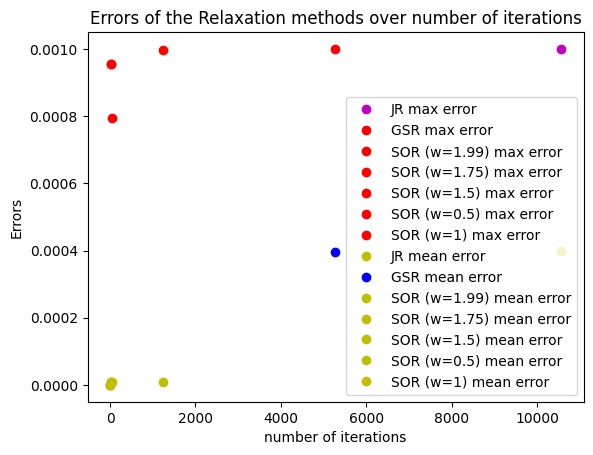

In [140]:
plt.plot(num_iter_JR, err_max_JR, "mo", label = "JR max error")
plt.plot(num_iter_GSR, err_max_GSR, "ro", label= "GSR max error")
plt.plot(num_iter_SOR_199, err_max_SOR_199, "ro", label = "SOR (w=1.99) max error")
plt.plot(num_iter_SOR_175,err_max_SOR_175, "ro", label = "SOR (w=1.75) max error")
plt.plot(num_iter_SOR_15, err_max_SOR_15, "ro", label = "SOR (w=1.5) max error")
plt.plot(num_iter_SOR_05, err_max_SOR_05, "ro", label = "SOR (w=0.5) max error")
plt.plot(num_iter_SOR_1, err_max_SOR_1, "ro", label = "SOR (w=1) max error")

plt.plot(num_iter_JR, err_mean_JR, "yo", label= "JR mean error")
plt.plot(num_iter_GSR, err_mean_GSR, "bo", label = "GSR mean error")
plt.plot(num_iter_SOR_199, err_mean_SOR_199, "yo", label = "SOR (w=1.99) mean error")
plt.plot(num_iter_SOR_175,err_mean_SOR_175, "yo", label = "SOR (w=1.75) mean error")
plt.plot(num_iter_SOR_15, err_mean_SOR_15, "yo", label = "SOR (w=1.5) mean error")
plt.plot(num_iter_SOR_05, err_mean_SOR_05, "yo", label = "SOR (w=0.5) mean error")
plt.plot(num_iter_SOR_1, err_mean_SOR_1, "yo", label = "SOR (w=1) mean error")

plt.title("Errors of the Relaxation methods over number of iterations")
plt.ylabel("Errors")
plt.xlabel("number of iterations")
plt.legend()

In [141]:
def potential_square(x, y, n_max):
    phi = 0
    for n in range(1,n_max):
        phi += (400/(n*np.pi))*np.sin(n*np.pi*y/L)*np.exp(-n*np.pi*x)
    return phi

arr_phi_1 = np.zeros((L,L))
arr_phi_10 = np.zeros((L,L)) 
arr_phi_100 = np.zeros((L,L))
arr_phi_1000 = np.zeros((L,L))

for i in range(L):
    for j in range(L):
        arr_phi_1[i][j] = potential_square(i,j,1)
        arr_phi_10[i][j] = potential_square(i,j,10)
        arr_phi_100[i][j] = potential_square(i,j,100)
        arr_phi_1000[i][j] = potential_square(i,j,1000)

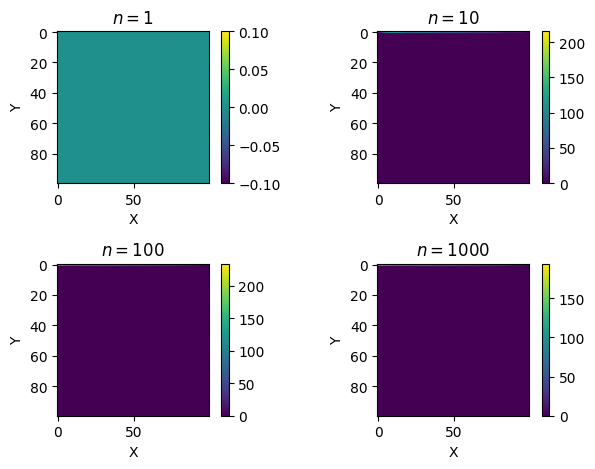

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=2)

im1 = ax[0, 0].imshow(arr_phi_1)
im2 = ax[0, 1].imshow(arr_phi_10)
im3 = ax[1, 0].imshow(arr_phi_100)
im4 = ax[1, 1].imshow(arr_phi_1000)

cbar1 = fig.colorbar(im1, ax=ax[0, 0])
cbar2 = fig.colorbar(im2, ax=ax[0, 1])
cbar3 = fig.colorbar(im3, ax=ax[1, 0])
cbar4 = fig.colorbar(im4, ax=ax[1, 1])

ax[0, 0].set_xlabel('X')
ax[0, 0].set_ylabel('Y')
ax[0, 0].set_title("$n=1$")

ax[0, 1].set_xlabel('X')
ax[0, 1].set_ylabel('Y')
ax[0, 1].set_title("$n=10$")

ax[1, 0].set_xlabel('X')
ax[1, 0].set_ylabel('Y')
ax[1, 0].set_title("$n=100$")

ax[1, 1].set_xlabel('X')
ax[1, 1].set_ylabel('Y')
ax[1, 1].set_title("$n=1000$")

plt.tight_layout()
plt.show()

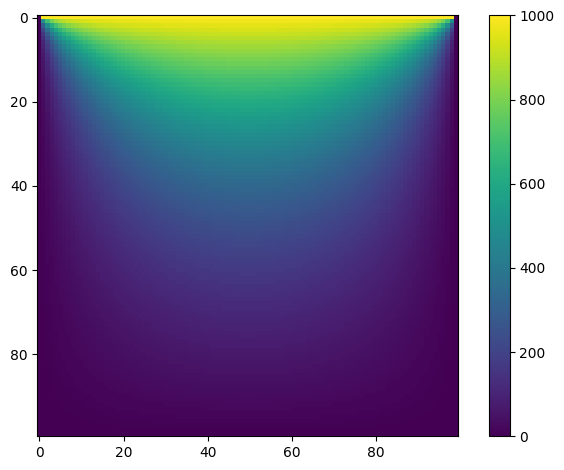

In [100]:
x_end_JR_reshaped = x_end_JR.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_JR_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()

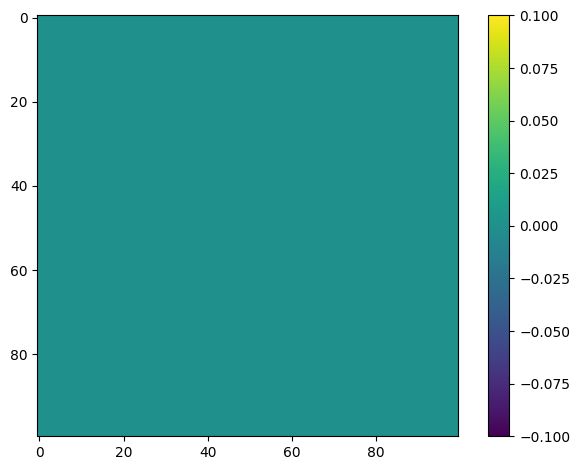

In [143]:
x_end_SOR_1_reshaped = x_end_SOR_1.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_SOR_1_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()

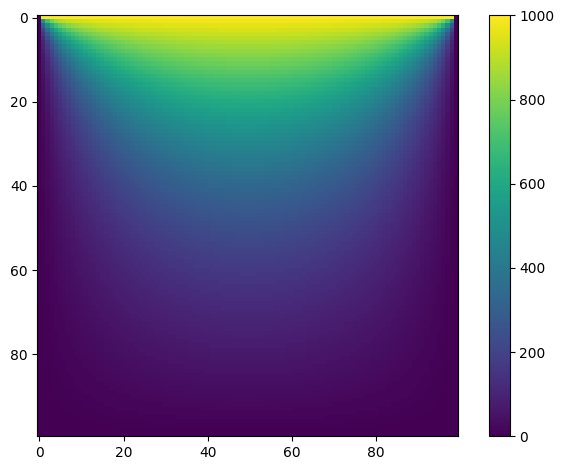

In [144]:
x_end_GSR_reshaped = x_end_GSR.reshape((L,L))
fig_1, ax_1 = plt.subplots()
im = ax_1.imshow(x_end_GSR_reshaped)
cbar = fig_1.colorbar(im, ax=ax_1)
plt.tight_layout()
plt.show()